# Racism and Fatal Police Shooting in the US

---------------------

![Racism](../resources/foto_racism.jpg)

## 1.Introduction

For my personal EDA project, I have chosen a very controversial topic that has been in national televisions all around the world and protests have been spreading around the globe.  The topic as such is:  Racism and fatal police Shooting in the US.
We often hear that police in the US, have a tendency to act strong against non-white people, specially black people.  Therefore, my goal is to prove if this is true by means of data.

The data I have collected has been from kaggle but the original data was gathered by a journalist from the Washington Post.  The data was collected from 2015 to 2017.

To achieve my goal, the main data I took into acount was the share of the different races (specially black race) and the states where there were more police brutality

-------------------

### Columns Information

The main information in the columns I have used are:

- Age - Age of the people being killed by the police	
- Gender - Gender of the people beeing killed by police
- Race - Types of races studied: White, black, Hispanic, Asian, Native American	
- City - Cities with more fatal police shooting
- State	- States with more fatal police shooting
- Threat_Level - Real threat caused by the suspects	
- year - 2015,2016,2017
- Share of the race = Ratio of the different races killed
- Percent_Completed_Hs =  Percentage of people that have finished High School
- Poverty_Rate = Poverty Rate of cities and states

-------------------

### Hypothesis

- The percentage of Fatal police Shooting in the US is higher within black population in comparison with other races



In [1]:
root_path = os.path.dirname(os.getcwd())
sys.path.append(root_path)
sys.path = list(set(sys.path)) 

import pandas as pd
import numpy as np
import sys 
import os 
from datetime import datetime

In [2]:
from src.utils.visualization_tb import *
from src.utils.folders_tb import *
from src.utils.mining_data_tb import *

## 2.Data Wrangling

In [3]:
race_type = pd.read_csv(root_path + "\\documentation\\Fatal_police_shooting\ShareRaceByCity.csv",encoding= 'unicode_escape')
police_killings = pd.read_csv(root_path + "\\documentation\\Fatal_police_shooting\\PoliceKillingsUS.csv",encoding= 'unicode_escape')
high_school = pd.read_csv(root_path + "\\documentation\\Fatal_police_shooting\\PercentOver25CompletedHighSchool.csv",encoding= 'unicode_escape')
poverty_rate = pd.read_csv(root_path + "\\documentation\\Fatal_police_shooting\\PercentagePeopleBelowPovertyLevel.csv",encoding= 'unicode_escape')

## 3.Glimpse of Data

In [4]:
police_killings.head(2)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False


In [5]:
race_type.head(2)

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1


In [6]:
high_school.head(2)

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1


In [7]:
poverty_rate.head(2)

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1


## 4. Data Cleaning
The goal of data cleaning is to have all the data ready to use in our analysis.  To do so, all the dataframes will be cleaned in order to merge them into a final dataframe which will we used for the analysis.  Our final dataframe will be called kill_and_social

#### Changes made to be able to merge the dataframes:

#### 4.1 Capitalizing first letter of every word in the column names

In [8]:
#2.1 Capitalizing first letter of every word in the column names so i can merge with same format of column names
police_killings = capitalize_first_letter_column(df=police_killings)
race_type = capitalize_first_letter_column(df=race_type)
high_school = capitalize_first_letter_column(df=high_school)
poverty_rate = capitalize_first_letter_column(df=poverty_rate)

#### 4.2 Merging dataframes

In [9]:
#merging the inicial dataframes that have social data
social_info = merging_dataframes(df=race_type,df1=high_school,df2=poverty_rate)

#### 4.3 Renaming Columns

In [10]:
#Renaming columns to be able to merge
social_info = renaming_cols(df=social_info)

#### 4.4 Cleaning each Dataframe
 At this point we have 2 dataframes.  
 We will proceed to analyse and clean them

These are the dataframes names:

- police_killings
- social_info

This is the final dataframe we will get by merging the above 2 dataframes:

- kill_and_social

### Dataframe cleaning - police_killings:

In [11]:
police_killings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       2535 non-null   int64  
 1   Name                     2535 non-null   object 
 2   Date                     2535 non-null   object 
 3   Manner_Of_Death          2535 non-null   object 
 4   Armed                    2526 non-null   object 
 5   Age                      2458 non-null   float64
 6   Gender                   2535 non-null   object 
 7   Race                     2340 non-null   object 
 8   City                     2535 non-null   object 
 9   State                    2535 non-null   object 
 10  Signs_Of_Mental_Illness  2535 non-null   bool   
 11  Threat_Level             2535 non-null   object 
 12  Flee                     2470 non-null   object 
 13  Body_Camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [12]:
#Dropping unnecessary columns
police_killings = drop_columns_killing_df(police_killings)

In [13]:
#Transforming column Date to a datatime and extracting the year from the datatime and adding it as a new column
polic_killings = changing_dates(police_killings)

In [14]:
#Transforming race name abreviations to the full word in order to have a better understanding of the results
police_killings = renaming_row_race_values(police_killings)

In [15]:
#Checking if there are missing values
counting_nulls(df=police_killings)

Name                 0
Date                 0
Manner_Of_Death      0
Armed                9
Age                 77
Gender               0
Race               195
City                 0
State                0
Threat_Level         0
year                 0
dtype: int64

In [16]:
#Gathering missing values percentage in relation with the full dataframe so we can make decisions in what to do with those values/rows
percent_missing_values(df=police_killings)

Name               0.000000
Date               0.000000
Manner_Of_Death    0.000000
Armed              0.355030
Age                3.037475
Gender             0.000000
Race               7.692308
City               0.000000
State              0.000000
Threat_Level       0.000000
year               0.000000
dtype: float64

In [17]:
#Dropping rows where values are NaN.  
#Race is our core subject so if there aren´t values,those rows are not necessary
#Porcentage of NaN values in Armed column is insignificant so we proceed to delete them
police_killings = drop_nan_rows(df=police_killings,df_column=police_killings["Race"])
police_killings = drop_nan_rows(df=police_killings,df_column=police_killings["Armed"])

In [18]:
#Missing age values are completed with the mean value
age_complete(df_column=police_killings["Age"])

In [19]:
#We have a clean dataframe ready to use
police_killings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2334 entries, 0 to 2534
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Name             2334 non-null   object        
 1   Date             2334 non-null   datetime64[ns]
 2   Manner_Of_Death  2334 non-null   object        
 3   Armed            2334 non-null   object        
 4   Age              2334 non-null   float64       
 5   Gender           2334 non-null   object        
 6   Race             2334 non-null   object        
 7   City             2334 non-null   object        
 8   State            2334 non-null   object        
 9   Threat_Level     2334 non-null   object        
 10  year             2334 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 218.8+ KB


### Dataframe Cleaning : social_info

In [20]:
#Dataframe with all the race population ratio
social_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29122 entries, 0 to 29121
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   State                  29122 non-null  object
 1   City                   29122 non-null  object
 2   Share_White            29122 non-null  object
 3   Share_Black            29122 non-null  object
 4   Share_Native_American  29122 non-null  object
 5   Share_Asian            29122 non-null  object
 6   Share_Hispanic         29122 non-null  object
 7   Percent_Completed_Hs   29122 non-null  object
 8   Poverty_Rate           29122 non-null  object
dtypes: object(9)
memory usage: 2.2+ MB


In [21]:
#Identifying missing values
counting_nulls(df=social_info)

State                    0
City                     0
Share_White              0
Share_Black              0
Share_Native_American    0
Share_Asian              0
Share_Hispanic           0
Percent_Completed_Hs     0
Poverty_Rate             0
dtype: int64

In [22]:
#Deleting unnecesary strings and transforming numeric columns to type float
social_info = pasando_a_nans(social_info)

In [23]:
#Missing value issues in this dataframe will be solved when we merge this dataframe with the one before (police_killings)
social_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29122 entries, 0 to 29121
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   State                  29122 non-null  object 
 1   City                   29122 non-null  object 
 2   Share_White            29103 non-null  float64
 3   Share_Black            29103 non-null  float64
 4   Share_Native_American  29103 non-null  float64
 5   Share_Asian            29103 non-null  float64
 6   Share_Hispanic         29103 non-null  float64
 7   Percent_Completed_Hs   28931 non-null  float64
 8   Poverty_Rate           28927 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.2+ MB


#### Final Dataframe Cleaning : kill_and_social

In [24]:
#Merging both dataframes and solving social_info missing values issue to create the final dataframe which will be used for our visualizations
kill_and_social = merge_kill_social(df=social_info,df2=police_killings)

In [25]:
#Transforming Year column from float to int
kill_and_social['year'] = kill_and_social['year'].astype(int)

In [26]:
#Dataframe cleaned to be used in our analysis and visualization
kill_and_social.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1998 entries, 0 to 2342
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Name                   1998 non-null   object        
 1   Date                   1998 non-null   datetime64[ns]
 2   Manner_Of_Death        1998 non-null   object        
 3   Armed                  1998 non-null   object        
 4   Age                    1998 non-null   float64       
 5   Gender                 1998 non-null   object        
 6   Race                   1998 non-null   object        
 7   City                   1998 non-null   object        
 8   State                  1998 non-null   object        
 9   Threat_Level           1998 non-null   object        
 10  year                   1998 non-null   int32         
 11  Share_White            1998 non-null   float64       
 12  Share_Black            1998 non-null   float64       
 13  Sha

In [27]:
#Final representation of the dataframe we will be using
kill_and_social.head(5)

,Name,Date,Manner_Of_Death,Armed,Age,Gender,Race,City,State,Threat_Level,year,Share_White,Share_Black,Share_Native_American,Share_Asian,Share_Hispanic,Percent_Completed_Hs,Poverty_Rate
0,Tim Elliot,2015-02-01,shot,gun,53.0,M,Asian,Shelton,WA,attack,2015,78.9,0.8,3.7,1.1,19.2,80.1,28.6
1,Lewis Lee Lembke,2015-02-01,shot,gun,47.0,M,White,Aloha,OR,attack,2015,70.9,2.6,1.0,8.9,21.1,88.1,14.9
2,Phyllis Ilene Jepsen,2015-02-10,shot,knife,55.0,F,White,Aloha,OR,other,2015,70.9,2.6,1.0,8.9,21.1,88.1,14.9
3,John Paul Quintero,2015-03-01,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,other,2015,71.9,11.5,1.2,4.8,15.3,87.5,17.3
4,Nicholas Garner,2015-08-22,shot,vehicle,26.0,M,White,Wichita,KS,attack,2015,71.9,11.5,1.2,4.8,15.3,87.5,17.3


## 5. Visualization

#### Total deaths caused by Police Shootings:
Looking at the bar chart, we can se that Fatal Police Shooting in the US has decreased during the years.  Infact, in 2017 there were aproximately half of the cases there were in 2015

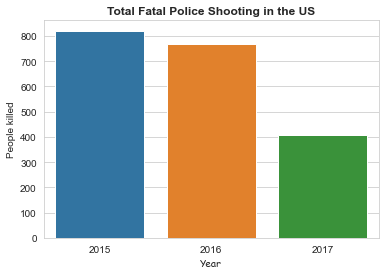

In [28]:
total_deaths_year(df=kill_and_social)

#### Manner of death:
As we can see on the pie chart, police shot the suspects in a 93.2% and also used the taser in a 6.8% of the occasions


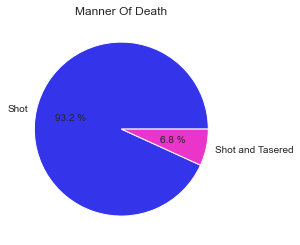

In [29]:
shot_or_tasered(df=kill_and_social)

#### Weapon Carried at the moment of death:

Suspects carried all kind of weapons as shown below.  However, guns were the ones they carried the most followed by knifes.

In [30]:
weapon_carried(df=kill_and_social)

#### Age of the people killed:

As shown in the histogram bellow, suspect from all ages were shot by police but we can clearly see that ages from 22 to 37 are the ones with more cases, overcoming 100 cases per age value

In [31]:
age_distribution(df=kill_and_social)

#### Gender percentage killed by Police:

We can clearly see here that fatal police shooting in the US is focused almost entirely on male suspects (95.5% of the cases)

In [32]:
gender_killed(df=kill_and_social)

#### Top cities with more police shooting:

Top 5 cities with more casualties caused by police shooting in the US.  Los Angeles (California) is the one with most cases followed by Phoenix(Arizona)

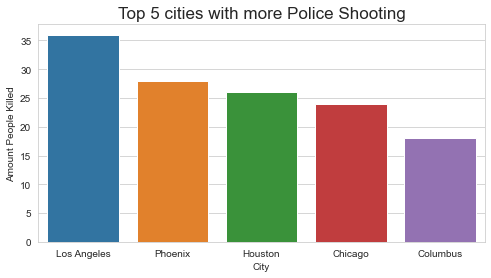

In [33]:
most_shooting_cities(df=kill_and_social)

#### Total Police Shooting by states:
As shown in the map bellow, California, Texas, Florida, Arizona, respectively, are the states with more Fatal Police Shooting in the whole of the US.  There is a clear tendency in more cases of Fatal Police Shooting at the south of the country 

In [34]:
mapa_killings_states(df=kill_and_social)

#### States with highest Poverty Rates:
The map, bellow, shows the 5 states with higher Poverty Rates between the years 2015 and 2017.  Alabama was in first place followed by Arizona, California, Arkansas and Alaska.  We can also see clearly, that highest poverty rates during these years were mostly in states at the south of the country

In [35]:
poverty_rate_func(df=kill_and_social)

#### Suspect threat Level:
Pie chart showing threat levels of the suspects.  64.1% directly attacked the officers with guns or other weapons.  The attack part, represents highest level of threat. "Other" includes incidents where officers faced significant threat

In [36]:
threat_level(df=kill_and_social)

#### States with highest percentage of  population with High School finished:
Bar chart representing the 10 states with the lowest percentage of people that have finished high school.  New Jersey(NJ), Kentucky(KY) and California(CA) are the ones with lowest percentage.  They don´t reach 80% of people finishing High School 

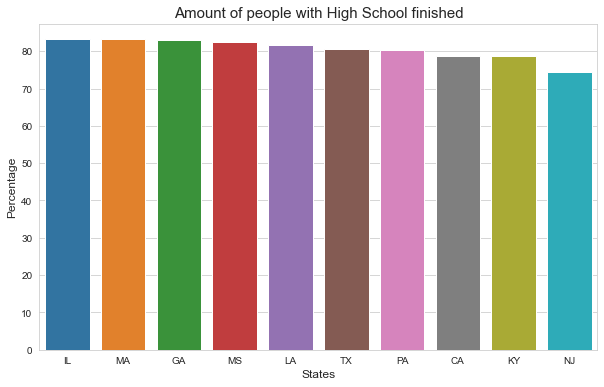

In [37]:
finished_hs(df=kill_and_social)

#### Total population killing by race:

Bar chart representing the total register of Fatal Police Shooting in the US.

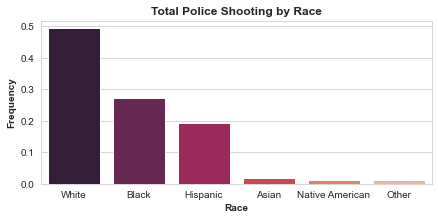

In [38]:
total_race(df=kill_and_social)

#### Percentage of Shooting on each race on total race population in the US:
Bar chart representing Fatal police Shooting on races in relation to the total population of that race in the US.  In this chart, we can clearly see that black suspects are the ones that most suffer police brutality in relation with the total population of black people in the united states.

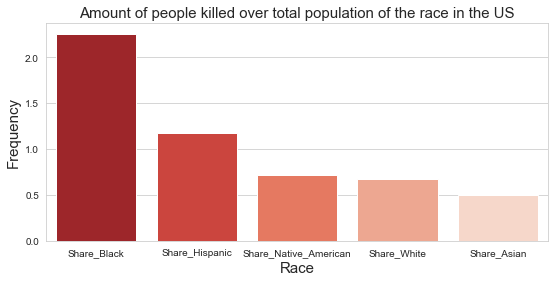

In [39]:
amount_race_shot(df=kill_and_social)

#### Amount of Black people killed vs Poverty Rate in different states
Scatter plot representing the link between amount of black suspects killed and the poverty rate in a particular state.  As we can see, there is no clear relationship between these two aspects. For example, we can see in states like Lousiana(LA) and Vermont(VT) that the poverty rate is almost the same but the percentage of black people shot by police is one of the highest in Lousiana(LA) but one of the lowest in Vermont(VT) in the whole of the US 
 

In [40]:
relation_poverty_black_deaths(df=kill_and_social)

#### Correlation Matrix (Heatmap):

This heatmap is made to show how important is each column in the dataframe in relation to our topic: Fatal Police Shooting in the US.  Positive correlation are above the value 0.5.
We can see that the highest correlation is 0.38 that is share_black and Poverty rate.
The lowest correlation is -0.71 Share_Black and Share_White

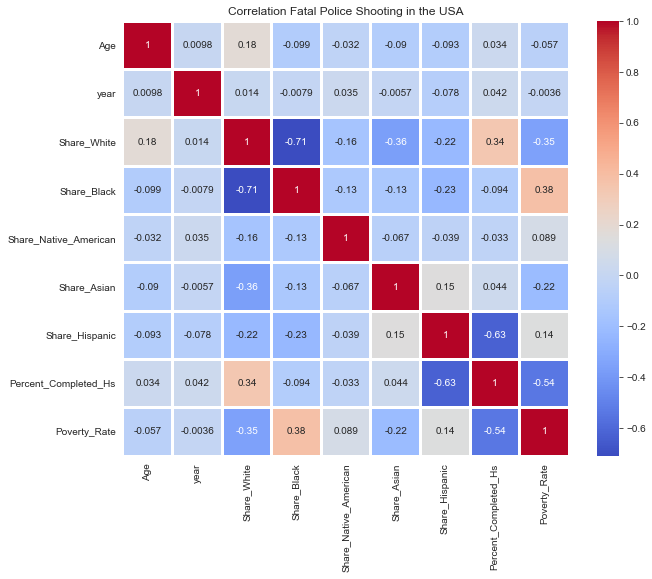

In [41]:
correlate(df=kill_and_social)

## 5. Project Timings

- Pie chart representing the amount of time spent in each of the steps of the project 

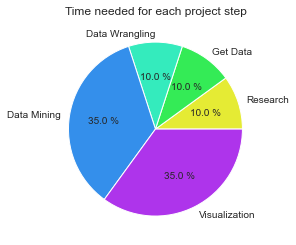

In [42]:
project_step_time()